In [23]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.utils.data as data

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
# load data set 
df = pd.read_csv('DATA/jena_climate_2009_2016.csv')
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [3]:
# we want to consider hourly data 
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [4]:
# change the index of the data frame to datetime
df.index = pd.to_datetime(df['Date Time'],format='%d.%m.%Y %H:%M:%S')
df[:10]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<AxesSubplot:xlabel='Date Time'>

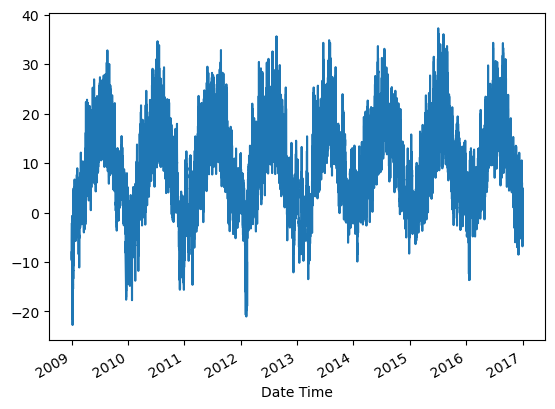

In [5]:
# let's visualize temp data 
temp = df['T (degC)']
temp.plot()

In [6]:
# [[1],[2],[3],[4],[5]] -> [6]
# [[2],[3],[4],[5],[6]] -> [7]
# [[3],[4],[5],[6],[7]] -> [8]
# Since the LSTM cell expects the input x in the form of multiple time steps, each input sample should be a 2D tensors: 
# One dimension for time and another dimension for features. [B,T,F]
def create_X_y(df,window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(df_as_np.shape[0]-window_size):
        row = [[t] for t in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append([label])
    return torch.Tensor(X),torch.Tensor(y)

In [7]:
window_size = 5                     # use previous 5 hours to predict temp in next hour
X,y = create_X_y(temp,window_size)  # create feature (X) and target (y) matrices 
X.shape,y.shape

(torch.Size([70086, 5, 1]), torch.Size([70086, 1]))

In [8]:
# create train. val and test data 
n1 = int(X.shape[0]*0.8)
n2 = int(X.shape[0]*0.9)

X_train, y_train = X[:n1],y[:n1]
X_val,y_val      = X[n1:n2],y[n1:n2]
X_test,y_test    = X[n2:],y[n2:]

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

(torch.Size([56068, 5, 1]),
 torch.Size([56068, 1]),
 torch.Size([7009, 5, 1]),
 torch.Size([7009, 1]),
 torch.Size([7009, 5, 1]),
 torch.Size([7009, 1]))

In [9]:

class LSTMForecast(nn.Module):
    def __init__(self,n_hidden=64):
        super().__init__()
        self.n_hidden = n_hidden
        self.lstm = nn.LSTM(input_size=1,hidden_size=n_hidden,num_layers=1,batch_first=True)
        self.linear = nn.Linear(n_hidden,1)
    def forward(self,x):
        out,_ = self.lstm(x)
        out = self.linear(out[:,-1,:])
        return out 

In [10]:
# let's train the model 

model = LSTMForecast()
model.to(device)
optimizer = torch.optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
data_loader = data.DataLoader(data.TensorDataset(X_train,y_train),shuffle=True,batch_size=10)

n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    for X_batch,y_batch in data_loader:
        X_batch,y_batch = X_batch.to(device),y_batch.to(device)
        y_pred = model(X_batch)
        loss = loss_fn(y_pred,y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    model.eval()
    with torch.no_grad():
        X_train,y_train,X_test,y_test = X_train.to(device),y_train.to(device),X_test.to(device),y_test.to(device)
        y_pred = model(X_train)
        train_loss = loss_fn(y_pred,y_train) # train loss 
        
        y_pred = model(X_test)
        test_loss =  loss_fn(y_pred,y_test)  # test loss 
        
    if epoch % 10 ==0:
        print(f'epoch:{epoch} | train_loss:{train_loss:.4f} | test_loss:{test_loss:.4f}')
    

epoch:0 | train_loss:0.6707 | test_loss:0.6716
epoch:10 | train_loss:0.6404 | test_loss:0.6621
epoch:20 | train_loss:0.6086 | test_loss:0.5993
epoch:30 | train_loss:0.6035 | test_loss:0.5906
epoch:40 | train_loss:0.6004 | test_loss:0.5914
epoch:50 | train_loss:0.6047 | test_loss:0.5864
epoch:60 | train_loss:0.5979 | test_loss:0.5865
epoch:70 | train_loss:0.6058 | test_loss:0.6185
epoch:80 | train_loss:0.5962 | test_loss:0.6034
epoch:90 | train_loss:0.5781 | test_loss:0.5823


In [22]:
# compare the predicted values vs actual for the test data 

test_predict = model(X_test)
test_predict = test_predict.flatten().cpu().detach().numpy()
train_results = pd.DataFrame(data={'Test pred':test_predict,'Actual':y_test.flatten().cpu()})
train_results

,Test pred,Actual
0,2.810516,2.75
1,2.620080,2.46
2,2.198153,1.93
3,1.647216,1.87
4,1.788197,1.93
...,...,...
7004,-1.132500,-0.98
7005,-1.711992,-1.40
7006,-1.615156,-2.75
7007,-2.921436,-2.89


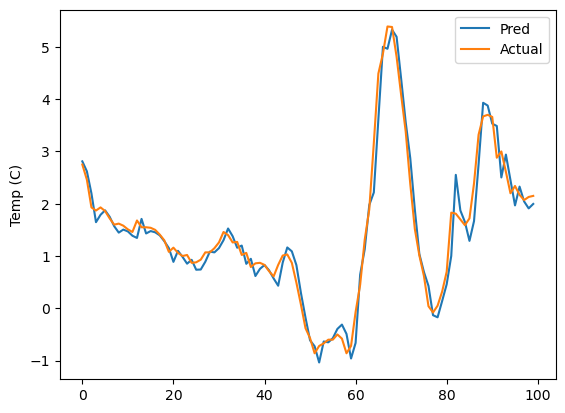

In [29]:
plt.plot(train_results['Test pred'][:100],label='Pred')
plt.plot(train_results['Actual'][:100],label='Actual')
plt.ylabel('Temp (C)')
plt.legend()